In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./cereal.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.38


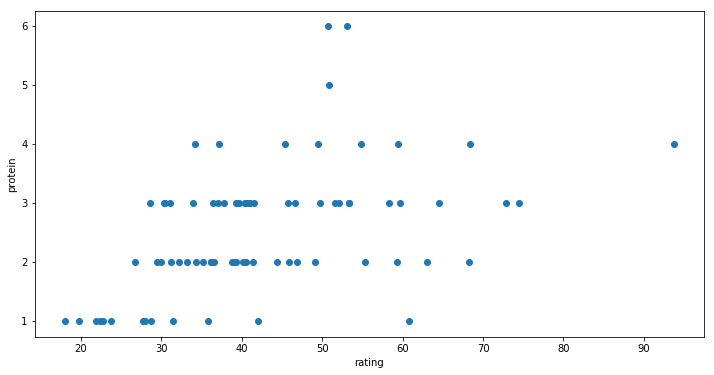

In [3]:
X = data[["rating", "protein"]]

plt.figure(figsize = (12,6))
plt.scatter(X["rating"], X["protein"])
plt.xlabel('rating')
plt.ylabel('protein')
plt.show()

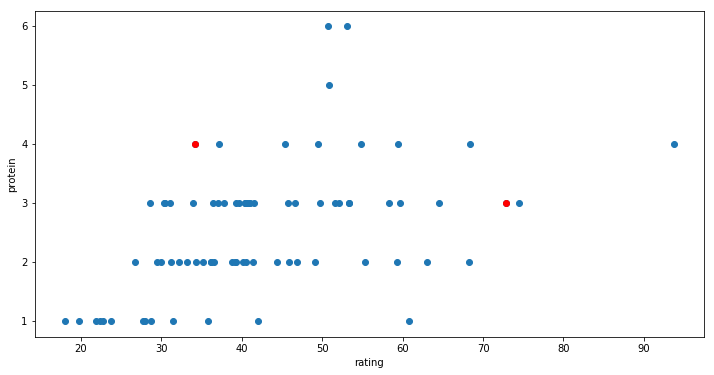

In [4]:
K=2

Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["rating"], X["protein"])
plt.scatter(Centroids["rating"], Centroids["protein"], c='red')
plt.xlabel('rating')
plt.ylabel('protein')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv("./cereal.csv")
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.38


In [7]:
sltd_data = data[["rating", "protein"]]

sltd_data.describe()

,rating,protein
count,77.000000,77.000000
mean,42.665325,2.545455
std,14.047301,1.094790
min,18.040000,1.000000
25%,33.170000,2.000000
50%,40.400000,3.000000
75%,50.830000,3.000000
max,93.700000,6.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

pd.DataFrame(data_scaled).describe()

,0,1
count,7.700000e+01,7.700000e+01
mean,-5.969251e-16,5.767392e-17
std,1.006557e+00,1.006557e+00
min,-1.764524e+00,-1.420902e+00
25%,-6.803862e-01,-5.014948e-01
50%,-1.623215e-01,4.179123e-01
75%,5.850387e-01,4.179123e-01
max,3.656883e+00,3.176134e+00


(-4, 5)

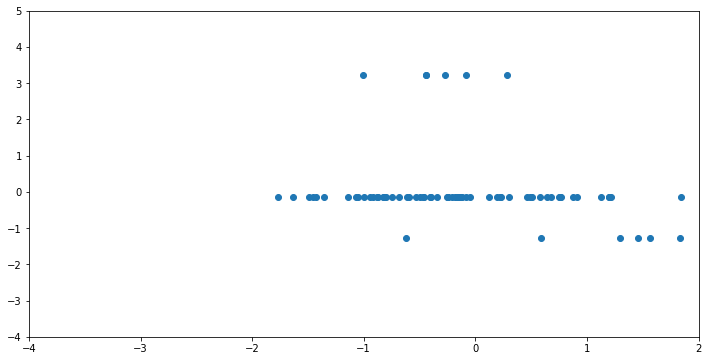

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [10]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
y_km = kmeans.fit_predict(data_scaled)

In [12]:
kmeans.inertia_

84.71944229767526

Text(0,0.5,'Inertia')

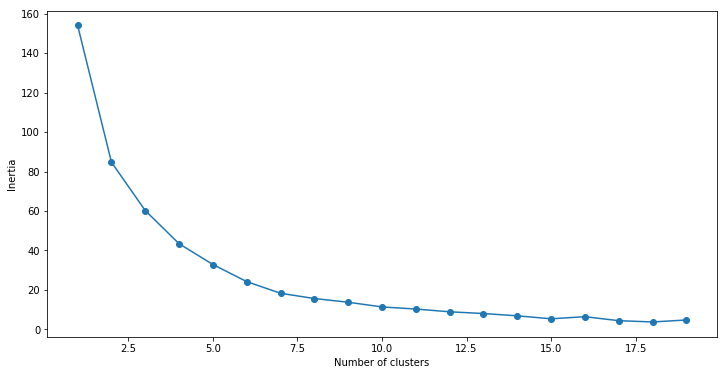

In [13]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

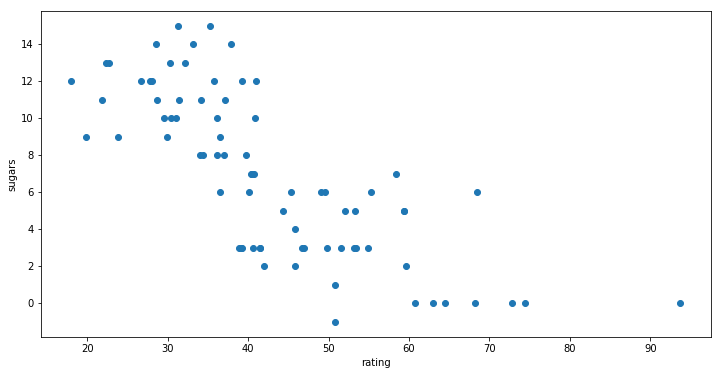

In [15]:
X = data[["rating", "sugars"]]

plt.figure(figsize = (12,6))
plt.scatter(X["rating"], X["sugars"])
plt.xlabel('rating')
plt.ylabel('sugars')
plt.show()

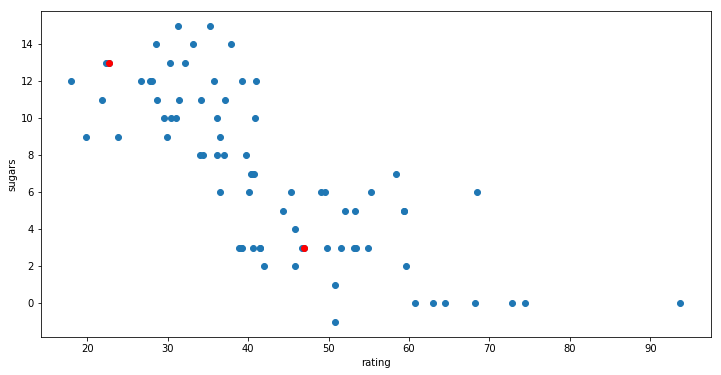

In [16]:
K=2

Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["rating"], X["sugars"])
plt.scatter(Centroids["rating"], Centroids["sugars"], c='red')
plt.xlabel('rating')
plt.ylabel('sugars')
plt.show()

In [17]:
sltd_data = data[["rating", "sugars"]]

sltd_data.describe()

,rating,sugars
count,77.000000,77.000000
mean,42.665325,6.922078
std,14.047301,4.444885
min,18.040000,-1.000000
25%,33.170000,3.000000
50%,40.400000,7.000000
75%,50.830000,11.000000
max,93.700000,15.000000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

pd.DataFrame(data_scaled).describe()

,0,1
count,7.700000e+01,7.700000e+01
mean,-5.969251e-16,-7.425518e-17
std,1.006557e+00,1.006557e+00
min,-1.764524e+00,-1.793978e+00
25%,-6.803862e-01,-8.881661e-01
50%,-1.623215e-01,1.764569e-02
75%,5.850387e-01,9.234575e-01
max,3.656883e+00,1.829269e+00


(-4, 5)

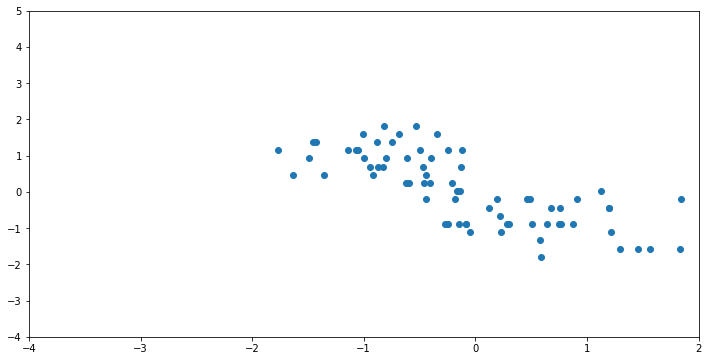

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [20]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
y_km = kmeans.fit_predict(data_scaled)

In [22]:
kmeans.inertia_

53.89770912026748

Text(0,0.5,'Inertia')

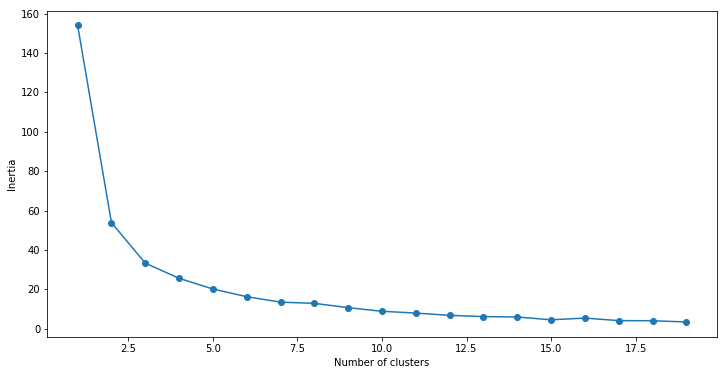

In [23]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

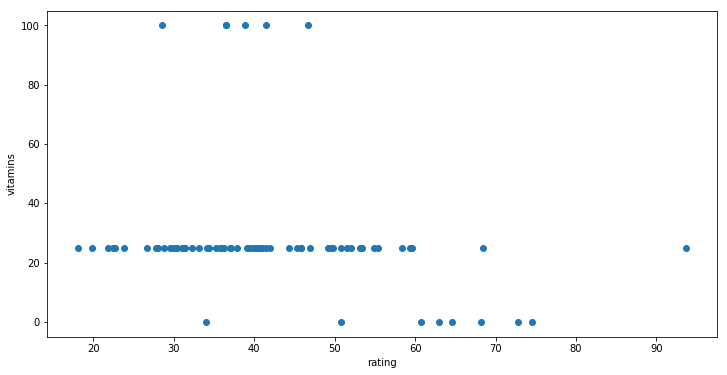

In [25]:
X = data[["rating", "vitamins"]]

plt.figure(figsize = (12,6))
plt.scatter(X["rating"], X["vitamins"])
plt.xlabel('rating')
plt.ylabel('vitamins')
plt.show()

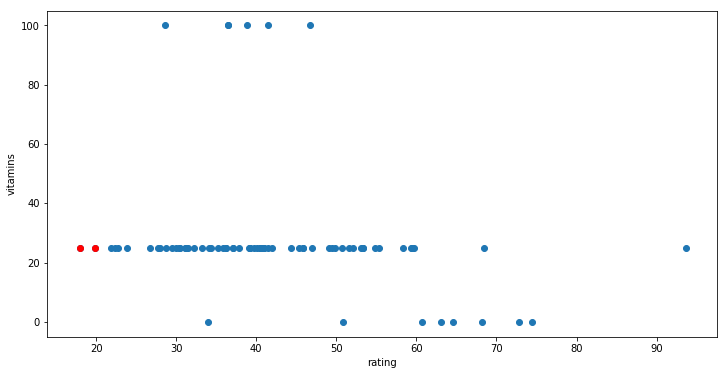

In [26]:
K=2

Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["rating"], X["vitamins"])
plt.scatter(Centroids["rating"], Centroids["vitamins"], c='red')
plt.xlabel('rating')
plt.ylabel('vitamins')
plt.show()

In [27]:
sltd_data = data[["rating", "vitamins"]]

sltd_data.describe()

,rating,vitamins
count,77.000000,77.000000
mean,42.665325,28.246753
std,14.047301,22.342523
min,18.040000,0.000000
25%,33.170000,25.000000
50%,40.400000,25.000000
75%,50.830000,25.000000
max,93.700000,100.000000


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

pd.DataFrame(data_scaled).describe()

,0,1
count,7.700000e+01,7.700000e+01
mean,-5.969251e-16,5.190653e-17
std,1.006557e+00,1.006557e+00
min,-1.764524e+00,-1.272550e+00
25%,-6.803862e-01,-1.462701e-01
50%,-1.623215e-01,-1.462701e-01
75%,5.850387e-01,-1.462701e-01
max,3.656883e+00,3.232570e+00


(-4, 5)

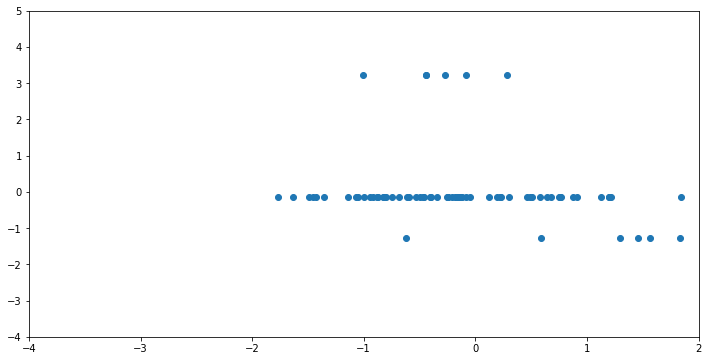

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

In [30]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
y_km = kmeans.fit_predict(data_scaled)

In [32]:
kmeans.inertia_

85.30725813343423

Text(0,0.5,'Inertia')

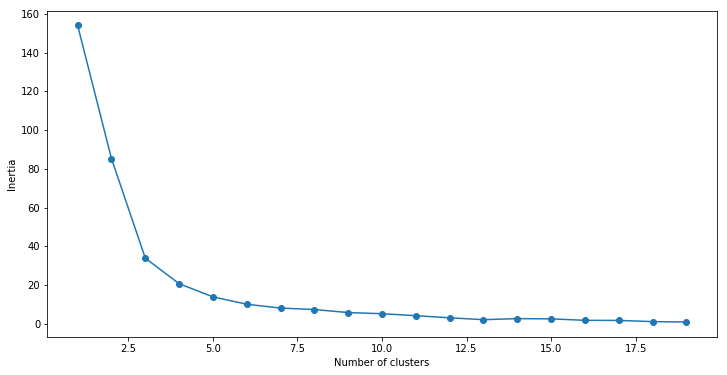

In [33]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')